# Simulate beta posterior

In the upcoming few exercises, you will be using the simulate_beta_posterior() function you saw defined in the last video. In this exercise, you will get a feel for what the function is doing by carrying out the computations it performs.

You are given a list of ten coin tosses, called tosses, in which 1 stands for heads, 0 for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, you will use a beta prior. Recall that if the prior is Beta(a,b), then the posterior is Beta(x,y), with:

x = NumberOfHeads + a 
y = NumberOfTosses - NumberOfHeads + b

In [1]:
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
import pymc3 as pm

In [2]:
def simulate_beta_posterior(trials, beta_prior_a,beta_prior_b):
    num_successes = no.sum(trails)
    posterior_draws = np.random.beta(
        num_successes+ beta_prior_a,
        len(trials) - num_successes + beta_prior_a,
        10000
    )
    return posterior_draws

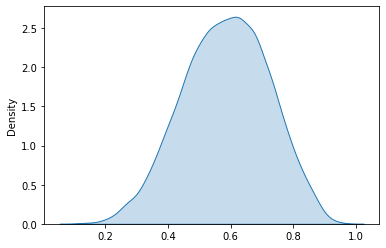

In [3]:
# Set prior parameters and calculate number of successes
tosses= [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

## Posterior click rates
After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that Beta(10,50) would be a good prior for the click-through rate.


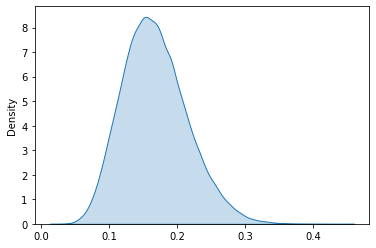

In [4]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

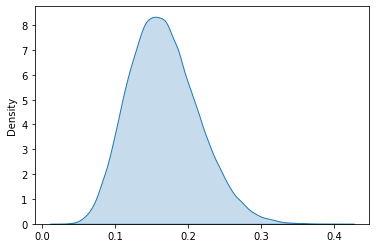

NameError: name 'ads' is not defined

In [5]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads['product'] == "clothes",'banner_clicked']
sneakers_clicked = ads.loc[ads['product'] == "sneakers",'banner_clicked']


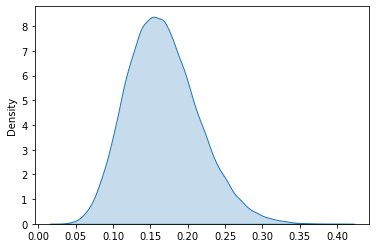

NameError: name 'ads' is not defined

In [6]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

## A or B, and how sure are we?
You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher. Let's get on with it!

In [ ]:
# Calculate posterior difference and plot it
diff = clothes_posterior- sneakers_posterior
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

In [ ]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

# Calculate and print 90% credible interval of posterior difference
interval = pm.hpd(diff, 0.9)
print(interval)

In [ ]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

# Calculate and print 90% credible interval of posterior difference
interval = pm.hpd(diff, hdi_prob=0.9)
print(interval)

# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff>0).mean()
print(clothes_better_prob)



 it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? 

## How bad can it be?
You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.

In [ ]:
# Slice diff to take only cases where it is negative
loss = diff[diff<0]

# Compute and print expected loss
expected_loss = loss.mean()
print(expected_loss)

You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!

## Decision analysis: cost
Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as clothes_posterior and sneakers_posteriors, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10'000 users. The company's advertising partner charges $2.5 per click on a mobile device and $2 on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.

In [ ]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10000
sneakers_num_clicks = sneakers_posterior * 10000

In [ ]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10_000
sneakers_num_clicks = sneakers_posterior * 10_000

# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks*2.5,
    "sneakers_mobile": sneakers_num_clicks*2.5,
    "clothes_desktop": clothes_num_clicks*2,
    "sneakers_desktop": sneakers_num_clicks*2,
}

In [ ]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10000
sneakers_num_clicks = sneakers_posterior * 10000

# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

# Draw a forest plot of ads_costs
pm.forestplot(ads_costs, hdi_prob= 0.99, textsize=15)
plt.show()

## Decision analysis: profit
Good job translating the posterior click rates into cost distributions! In the meantime, a new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. Can you adjust your findings accordingly, knowing that the expected revenue per click from a mobile ad is $3.4, and the one from a desktop ad is $3? To calculate the profit, you need to calculate the revenue from all clicks, then subtract the corresponding cost from it.

In [ ]:
# Calculate profit distributions for each product and platform


ads_profit = {
    "clothes_mobile": clothes_num_clicks*3.4 - ads_costs['clothes_mobile'],
    "sneakers_mobile": sneakers_num_clicks*3.4 - ads_costs['sneakers_mobile'],
    "clothes_desktop": clothes_num_clicks*3- ads_costs['clothes_desktop'],
    "sneakers_desktop": sneakers_num_clicks*3- ads_costs['sneakers_desktop']
}

# Draw a forest plot of ads_profit
pm.forestplot(ads_profit, hdi_prob = 0.99)
plt.show()



## Analyzing regression parameters
Your linear regression model has four parameters: the intercept, the impact of clothes ads, the impact of sneakers ads, and the variance. The draws from their respective posterior distributions have been sampled for you and are available as intercept_draws, clothes_draws, sneakers_draws, and sd_draws, respectively.

In [ ]:
# Collect parameter draws in a DataFrame
posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
})

In [ ]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = intercept_draws.mean()
sneakers_coef = sneakers_draws.mean()
clothes_coef = clothes_draws.mean()
sd_coef = sd_draws.mean()

In [ ]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

# Calculate the mean of the predictive distribution
pred_mean = intercept_coef+10*sneakers_coef + 10*clothes_coef

In [ ]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + sneakers_coef * 10 + clothes_coef * 10

# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

In [ ]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + sneakers_coef * 10 + clothes_coef * 10

# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob=0.99)
plt.show()